<div style="text-align: center;">

# Data Assimilation lightweight package
##### Jose R. Miranda
###### Department of Scientific Computing, Florida State University, Tallahassee, FL, United States
####  Final Report for ISC 5935 - Computational Aspects of Data Assimilation
</div>



## Abstract

This report presents a comprehensive overview of various data assimilation methods, providing a library that implements linear and nonlinear techniques, including the Best Linear Unbiased Estimator (BLUE), Kalman Filter (KF), Extended Kalman Filter (EKF), and Ensemble Kalman Filter (EnKF), and 3DVar (4DVar is also present, but not fully operational). This work aims to elucidate these methods' theoretical foundations, formulations, and provides working algorithms and practical applications through simulated examples. Results from these methods should demonstrate their efficacy in improving state estimation by integrating diverse observational data into model forecasts. The report's findings underscore the potential of these methods to enhance predictive accuracy and provide insights into their application within educational settings and larger scale data assimilation projects.

## Introduction

This report functions as a toolbox for data assimilation, assembled as the culminating effort in the course "Computational Aspects of Data Assimilation" (ISC 4933/5935). It aims to aggregate essential concepts, methodologies, and practical applications discussed throughout the course, serving as a robust reference for theoretical understanding and practical application.

Data assimilation is vital in disciplines such as meteorology, oceanography, and climate science, where accurate real-time data integration is essential for predictive models. The methodologies covered include linear and nonlinear techniques, each essential for understanding and implementing state estimation and model correction based on observational data.

The educational value of this effort is twofold. It provides a structured overview of data assimilation techniques through theoretical discussions and mathematical formulations. Additionally, it supplements the hands-on experiences gained through the course's notebooks and homework assignments, deepening understanding of the subject matter and encouraging the practical application of these concepts.

Special attention was given to the data assimilation packages introduced in the first lecture. These packages are pivotal in the field, and this report situates them within the broader data assimilation techniques framework. The report compares these methodologies and discusses their strengths and weaknesses, aiming to offer a clear view of current practices and emerging trends in data assimilation.

This toolbox is intended as a resource for students, educators, and professionals in related fields, providing a clear guide to data assimilation that can enhance both academic learning and operational efficiency.

## Data and Methods

This report is structured to demonstrate the implementation of various data assimilation techniques using Python. The provided implementations are contained in the `DA.py` file, and encapsulated in functions that allow for straightforward application to both synthetic and real-world datasets. Each function is designed to be reusable and modifiable, accommodating different models and data assimilation scenarios.

A fluxogram to illustrate the typical workflow with these implementations is proposed:

```plaintext
Start
  │
  ├─► [Initialization] ──► Set initial conditions and configurations (e.g., state vectors, covariance matrices)
  │
  ├─► [Model Propagation] ──► Apply dynamical models to predict future states
  │
  ├─► [Observation Handling] ──► Integrate new observational data
  │
  ├─► [Assimilation Technique] ──► Select and apply an appropriate data assimilation method
  │                              (e.g., Kalman Filter, BLUE, EKF)
  │
  └─► [Analysis and Visualization] ──► Analyze and visualize outcomes
      └─► End
```

The contents of the `DA.py` library are briefly presented below:

```plaintext

BLUE (Best Linear Unbiased Estimator):
   - blue_update: Updates state estimate based on new observations using the BLUE method, ideal for linear systems with Gaussian errors.

Kalman Filter:
   - kf_predict: Predicts the next state and covariance based on the current state and model dynamics.
   - kf_update: Updates the predicted state and covariance using new observations and the observation model.

Extended Kalman Filter (EKF):
   - ekf_predict: Extends kf_predict to nonlinear systems by using a nonlinear transition function and its Jacobian.
   - ekf_update: Extends kf_update to nonlinear systems using a nonlinear observation function and its Jacobian.

Ensemble Kalman Filter (EnKF):
   - initialize_ensemble: Generates an initial ensemble of state estimates based on a mean and covariance.
   - forecast_ensemble: Propagates each ensemble member forward using a model function.
   - update_ensemble: Updates each ensemble member based on new observations.

Localization and Inflation (Used in Ensemble Methods):
   - apply_localization: Applies a spatial filter to the covariance matrix to mitigate distance-related correlation errors.
   - apply_inflation: Increases the spread of the ensemble to prevent filter divergence.

Stochastic/Deterministic Ensemble Updates:
   - stochastic_ensemble_update: Updates the ensemble considering both the model and observation uncertainties.
   - deterministic_ensemble_update: Updates the ensemble using a deterministic approach without perturbing observations.

3D Variational Data Assimilation (3D-Var):
   - J_3dvar: Defines the cost function for 3D-Var which quantifies the fit to the observations and the background state.
   - grad_J_3dvar: Computes the gradient of the 3D-Var cost function, used for optimization.
   - three_d_var: Executes the 3D-Var assimilation process, aiming to minimize the cost function to find the optimal state estimate.

4D Variational Data Assimilation (4D-Var) - Not fully operational:
   - model_propagation: Propagates an initial state through the model over specified times.
   - J_4dvar: Defines the cost function for 4D-Var which includes contributions over a time window.
   - four_d_var: Aims to minimize the 4D-Var cost function to adjust the trajectory of the state estimate.
```

#### Limitations Compared to Other Packages
While this toolbox provides foundational tools for understanding and implementing data assimilation techniques, it has several limitations compared to more developed packages like AMLCS-DA and DAPPER:

- **Scalability**: The current implementations are suited for educational purposes and smaller-scale problems. They may not perform efficiently with very large datasets or highly complex models often encountered in professional research environments.
- **Advanced Features**: Unlike comprehensive packages such as DAPPER, this toolbox lacks advanced features like automatic tuning of parameters, advanced error modeling, and support for high-dimensional systems.
- **User Interface**: The toolbox is script-based and requires a working knowledge of Python and numerical methods, which may limit its accessibility compared to packages with dedicated graphical interfaces or more extensive documentation.

These limitations notwithstanding, the toolbox aims to serve as an introductory resource for students and professionals new to the field of data assimilation, providing a hands-on approach to learning essential techniques and concepts. Future enhancements should focus on expanding the toolbox’s capabilities to include more sophisticated methods and improving user-friendliness to reach a broader audience.

### Module 1: Linear Algebra

#### Overview
Linear algebra is a fundamental branch of mathematics that provides tools for manipulating and interpreting data in multiple dimensions, essential for the field of data assimilation.

#### Theoretical Background
Linear algebra revolves around the study of vectors, matrices, and operations that can be performed on them. It forms the backbone of many algorithms used in data assimilation, facilitating the representation and transformation of system states and observation data efficiently.

- **Vectors** (lower-case, e.g. $\mathbf{x}$) are arrays of numbers representing points or directions in space.
- **Matrices** (upper-case, e.g. $\mathbf{A}$) are rectangular arrays of numbers facilitating linear transformations from one vector space to another.
- **Eigenvalues** ($\lambda$) and **eigenvectors** ($\mathbf{v}$) of a matrix provide insights into the system dynamics, where eigenvectors represent directionally invariant vectors under those transformations, and eigenvalues indicate the scale of the transformation in those directions.

#### Mathematical Formulations
Key operations in linear algebra include:

- **Matrix Multiplication** ($\mathbf{C} = \mathbf{A} \mathbf{B}$): This operation is crucial for combining transformations, where each element of the resulting matrix $\mathbf{C}$ is computed as the dot product of the rows of $\mathbf{A}$ and the columns of $\mathbf{B}$.
- **Matrix Inversion** ($\mathbf{A}^{-1}$): Finding a matrix that, when multiplied by the original, results in the identity matrix, used to solve systems of linear equations.
- **Eigen Decomposition**: Decomposing a matrix into eigenvectors and eigenvalues, useful in understanding system behavior and stability.

#### Example Problem
Consider a system where observations are made in a transformed space defined by a matrix $\mathbf{A}$. We need to transform these observations back to the original state space for analysis. Assume $\mathbf{A}$ is invertible, and the observed vector in transformed space is $\mathbf{y}$.

$$
\mathbf{x} = \mathbf{A}^{-1} \mathbf{y}
$$

This problem demonstrates how linear algebra is utilized in transforming observation vectors in data assimilation, aiding in the reconstruction of the original system states from observations made in a transformed space.



In [12]:
import numpy as np

# Define a transformation matrix A
A = np.array([[1, 2], [3, 4]])

# Assume an observed vector y in the transformed space
y = np.array([5, 11])

# Calculate the inverse of matrix A
A_inv = np.linalg.inv(A)

# Transform y back to the original space
x = np.dot(A_inv, y)

x  # This will output the original state vector x

array([1., 2.])

### Module 2: Statistics

#### Overview
Statistics plays an indispensable role in data assimilation, particularly in managing uncertainties and quantifying the accuracy of predictions.

#### Theoretical Background
Statistics in data assimilation revolves around understanding and applying concepts of mean, variance, and covariance, which are essential for assessing model reliability and the likelihood of certain outcomes.

- **Mean** ($\mu$): Represents the average value in a dataset, providing a central value around which other data points are distributed.
- **Variance** ($\sigma^2$): Measures the spread of data points around the mean, indicating the level of dispersion within the dataset.
- **Covariance** ($\Sigma$): Evaluates how two variables change together, which is crucial for understanding relationships between different data types in data assimilation.

Probability distributions, particularly Gaussian distributions, are central to many data assimilation techniques because of their mathematical properties and the central limit theorem, which states that under certain conditions, the sum of a large number of random variables approximately follows a Gaussian distribution.

#### Mathematical Formulations
Key statistical operations include:

- **Mean Calculation**:
  $$
  \mu = \frac{1}{n} \sum_{i=1}^n x_i
  $$
- **Variance Calculation**:
  $$
  \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2
  $$
- **Covariance Calculation**:
  $$
  \Sigma = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)(y_i - \mu)
  $$

#### Example Problem
Consider a data assimilation scenario where observations from different sensors with varying accuracies are being used to update a weather prediction model. Calculate the mean and covariance of the temperature observations to understand the uncertainty in the measurements and improve the model forecasts.



In [13]:
# Simulate temperature observations from different sensors
temperature_data = np.array([[20.5, 20.7, 20.6],
                             [21.0, 20.9, 21.1],
                             [20.8, 20.7, 20.9]])

# Calculate the mean temperature for each sensor
mean_temperatures = np.mean(temperature_data, axis=0)

# Calculate the covariance matrix to understand how temperature readings vary together across sensors
covariance_matrix = np.cov(temperature_data, rowvar=False)

mean_temperatures, covariance_matrix  # Outputs the mean and covariance matrix of the temperatures

(array([20.76666667, 20.76666667, 20.86666667]),
 array([[0.06333333, 0.02333333, 0.06333333],
        [0.02333333, 0.01333333, 0.02333333],
        [0.06333333, 0.02333333, 0.06333333]]))

The computed results for the mean temperatures and covariance matrix of temperature measurements from the sensors are:

- **Mean Temperatures**: $[20.77, 20.77, 20.87]$ degrees Celsius
- **Covariance Matrix**:
  $$
  \begin{bmatrix}
  0.063 & 0.023 & 0.063 \\
  0.023 & 0.013 & 0.023 \\
  0.063 & 0.023 & 0.063 \\
  \end{bmatrix}
  $$

This matrix shows how temperature readings vary together across sensors, with the diagonal elements representing the variance of each sensor and the off-diagonal elements showing the covariance between different sensor readings.

These statistical calculations help in understanding the uncertainty and correlations in measurements, crucial for updating and improving prediction models in data assimilation.

### Module 3: Bayes' Theorem

#### Overview
Bayes' Theorem is a fundamental statistical tool in data assimilation that updates the probability estimate for a state based on new evidence. It is extensively used in various scientific fields to refine predictions.

#### Theoretical Background
Bayes' Theorem allows the integration of new observational data with prior estimates to update beliefs about the state of a system. It combines prior probability (the initial belief before new data) and likelihood (the probability of observing the new data given the state) to produce a posterior probability (updated belief).

- **Prior Probability** ($P(A)$): The initial estimate of the likelihood of an event before new data is considered.
- **Likelihood** ($P(B|A)$): The probability of observing the new data given that the event has occurred.
- **Posterior Probability** ($P(A|B)$): The revised probability of the event given the new data.

#### Mathematical Formulations
The formula for Bayes' Theorem is given by:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$
Where $P(B)$ is the probability of observing the new data under all possible conditions and can be calculated using the law of total probability:
$$
P(B) = \sum_{i} P(B|A_i) \cdot P(A_i)
$$

#### Example Problem
Assume a scenario in a meteorological model where there are two possible weather conditions, rain ($R$) and no rain ($N$), and a sensor that detects rain. The sensor has a reliability of 95% (i.e., the probability it correctly identifies rain when it is raining is 95%, and the probability it incorrectly signals rain when it is not raining is 5%).

Calculate the probability of it actually raining, given that the sensor has detected rain, if the prior probability of rain on any given day is 20%.



In [14]:
# Define probabilities
P_R = 0.2  # Probability of rain (prior)
P_N = 1 - P_R  # Probability of no rain
P_S_R = 0.95  # Probability sensor detects rain given it's raining
P_S_N = 0.05  # Probability sensor detects rain given it's not raining

# Calculate the total probability of the sensor detecting rain
P_S = P_S_R * P_R + P_S_N * P_N

# Apply Bayes' Theorem to find the probability of rain given the sensor detects rain
P_R_S = (P_S_R * P_R) / P_S

P_R_S  # This will output the posterior probability of it raining given the sensor detects rain

0.8260869565217391

The posterior probability of it raining given that the sensor has detected rain is approximately 0.826 or 82.6%. This calculation illustrates how Bayes' Theorem helps in updating our beliefs based on new information, enhancing the predictive accuracy in scenarios where prior knowledge and observational data are combined.

### Module 4: Best Linear Unbiased Estimator (BLUE)

#### Overview
BLUE is a statistical technique in data assimilation that optimally combines multiple observations to estimate a state with minimized error variance.

#### Theoretical Background
BLUE is characterized by its ability to provide an estimate that is the best (in the sense of having minimum variance), linear, and unbiased. This estimator is crucial in situations where data from multiple sources must be aggregated to improve the accuracy of state estimates.

- **Best**: The estimator has the smallest error variance among all linear and unbiased estimators.
- **Linear**: The estimator is a linear combination of the observations.
- **Unbiased**: The expected value of the estimator equals the true value.

#### Mathematical Formulations
The BLUE estimate $\hat{x}$ is derived by optimizing the weights applied to the observations to minimize the overall error variance. The formula is given by:
$$
\hat{x} = x + W(y - Hx)
$$
Where:
- $x$ is the prior estimate of the state.
- $y$ is the vector of observations.
- $H$ is the observation matrix.
- $W$ Weight matrix calculated as:
$$
W = P H^T (H P H^T + R)^{-1}
$$
- $P$ is the covariance matrix of the prior estimate.
- $R$ is the covariance matrix of the observation error.

#### Example Problem
This example demonstrates the application of the Best Linear Unbiased Estimator (BLUE) in updating initial temperature estimates for different ocean depths. The example simulates a scenario where true temperatures decrease linearly from 30°C at the surface to 15°C at the deepest point of the ocean. Observations are generated with some noise to mimic real-world measurement errors, and initial estimates are intentionally offset and also noisy to simulate typical inaccuracies in initial data.

The example below implements the following:

- **True Temperature Simulation**: A linear temperature profile is created for 50 depth levels.
- **Noisy Observations Generation**: Random noise is added to the true temperatures to simulate real sensor measurements.
- **Initial Estimates Preparation**: Initial temperature estimates are generated slightly off from the true values.
- **BLUE Update**: The initial estimates are updated using the BLUE method, taking into account the variances of the initial estimates and the observations.


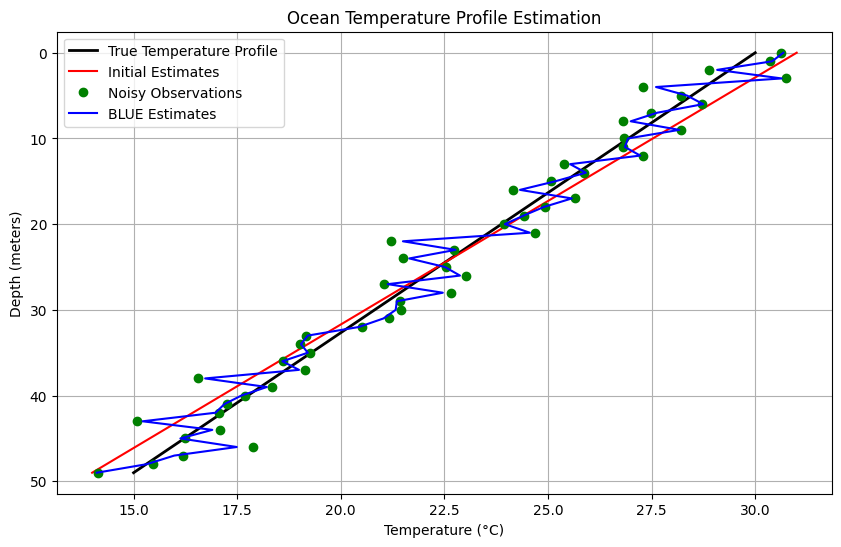

In [15]:
from DA import blue_update
import matplotlib.pyplot as plt

# Define parameters
max_depth = 50  # Number of depth levels
true_temperatures = np.linspace(30, 15, max_depth) # Linear decrease from 20°C at the surface to 5°C at the deepest point
noise_std = 0.8  # Standard deviation of the observation noise

# Generate noisy observations
observations = true_temperatures + np.random.normal(0, noise_std, max_depth)

# Initial estimates from an imperfect model
initial_state = np.linspace(31, 14, max_depth)
initial_covariance = np.eye(max_depth) * 4.0  # Initial covariance, larger uncertainty

# Observation matrix (identity because we observe direct temperature at each depth)
observation_matrix = np.eye(max_depth)

# Observation covariance (assume constant error variance across all depths)
observation_covariance = np.eye(max_depth) * (noise_std ** 2)

# Perform the BLUE update
updated_state, updated_covariance = blue_update(
    initial_state, initial_covariance, observations, observation_covariance, observation_matrix
)

# Function to plot results
def plot_results(depths, true_data, initial_data, observation_data, updated_data):
    plt.figure(figsize=(10, 6))
    plt.plot(true_data, depths, 'k', label='True Temperature Profile', linewidth=2.)
    plt.plot(initial_data, depths, 'r', label='Initial Estimates')
    plt.plot(observation_data, depths, 'g', label='Noisy Observations', linestyle='None', marker='o')
    plt.plot(updated_data, depths, 'b', label='BLUE Estimates')
    plt.gca().invert_yaxis()  # Invert y axis to show depth correctly
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Depth (meters)')
    plt.title('Ocean Temperature Profile Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_results(np.arange(max_depth), true_temperatures, initial_state, observations, updated_state)

### Module 5: Kalman Filter

#### Overview
The Kalman Filter is a recursive estimator that is optimal for systems governed by linear equations and Gaussian noise. It is extensively used in data assimilation to integrate new information with existing estimates.

#### Theoretical Background
The Kalman Filter operates by predicting the future state of a system and then updating this prediction based on new observational data. It is designed for systems where all uncertainties, including those in initial states, the evolutionary process, and observations, are modeled as Gaussian processes.

- **Predict Step**: Estimates the state forward in time before the next measurement.
- **Update Step**: Adjusts the predicted state based on new observational data.

#### Mathematical Formulations
The Kalman Filter involves two sets of equations: the predict equations and the update equations.

- **Predict Equations**:
  $$
  \hat{x}^- = F \hat{x}
  $$
  $$
  P^- = FPF^T + Q
  $$
  Where $F$ is the state transition model applied to the previous state $\hat{x}$, $P$ is the state covariance, and $Q$ is the process noise covariance matrix.

- **Update Equations**:
  $$
  K = P^- H^T (H P^- H^T + R)^{-1}
  $$
  $$
  \hat{x} = \hat{x}^- + K(y - H \hat{x}^-)
  $$
  $$
  P = (I - KH)P^-
  $$
  Where $K$ is the Kalman Gain, $H$ is the observation model, $y$ is the actual measurement, and $R$ is the measurement noise covariance.

#### Example Problem
This example demonstrates the application of the Kalman Filter (KF) in a simple simulation of a state evolving over time with random noise. The state evolution is modeled by a basic linear equation, with the true state at each time step being the previous state plus a small random process noise. This setup is typical in many real-world applications where the state of a system changes over time under the influence of stochastic processes.

The Kalman Filter is utilized to estimate the true state based on noisy observations, which are generated by adding Gaussian noise to the true state. The example compares the effectiveness of the Kalman Filter against the Best Linear Unbiased Estimator (BLUE) in tracking the state of a system over time. Here are the steps outlined in the code:

- State and Observation Generation: A true state is simulated, and noisy observations are generated for a number of time steps.
- Kalman Filter Application: The Kalman Filter is applied using prediction and update steps to estimate the state based on the noisy observations.
- Visualization: The true states, noisy observations, and estimates from the Kalman Filter and BLUE are shown for comparison.


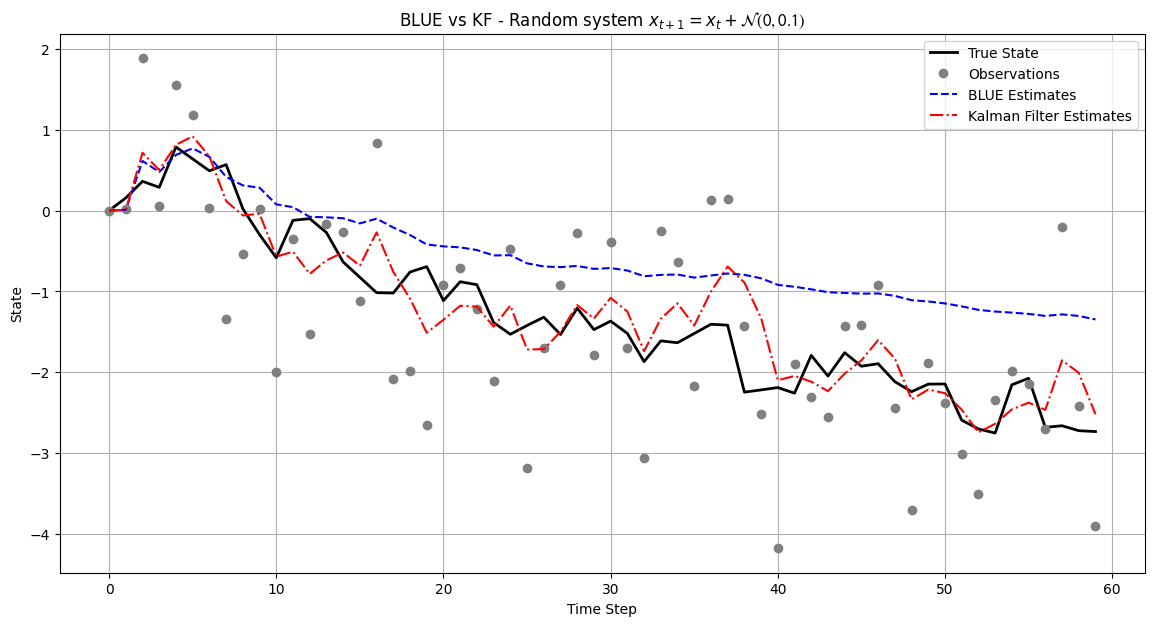

In [16]:
from DA import kf_predict, kf_update

# Parameters for the simulation
np.random.seed(42)
n_timesteps = 60  # Number of timesteps
true_state = np.zeros(n_timesteps)
noisy_observations = np.zeros(n_timesteps)
F = np.array([[1]])  # State transition matrix
H = np.array([[1]])  # Observation matrix
Q = np.array([[0.1]])  # Process noise covariance
R = np.array([[1]])  # Observation noise covariance
initial_state = np.array([0])
initial_covariance = np.array([[10]])

# Generate the true states and noisy observations
for t in range(1, n_timesteps):
    true_state[t] = (F @ true_state[t-1:t] + np.random.normal(0, np.sqrt(Q[0,0]))).item()
    noisy_observations[t] = (H @ true_state[t:t+1] + np.random.normal(0, np.sqrt(R[0,0]))).item()

# Initialize the states, covariances, and estimates arrays for each method
state_blue = initial_state.copy()
covariance_blue = initial_covariance.copy()
# state_bayesian = initial_state.copy()
# covariance_bayesian = initial_covariance.copy()
kf_state = initial_state.copy()
kf_covariance = initial_covariance.copy()
blue_estimates = np.zeros(n_timesteps)
bayesian_estimates = np.zeros(n_timesteps)
kf_estimates = np.zeros(n_timesteps)

# Apply the methods to each observation
for t in range(n_timesteps):
    # BLUE update
    state_blue, covariance_blue = blue_update(state_blue, covariance_blue, noisy_observations[t:t+1], R, H)
    blue_estimates[t] = state_blue[0]  # Access scalar value
    
    # # Bayesian Data Assimilation update
    # state_bayesian, covariance_bayesian = bayesian_data_assimilation(state_bayesian, covariance_bayesian, noisy_observations[t:t+1], R, H)
    # bayesian_estimates[t] = state_bayesian[0]  # Access scalar value
    
    # Kalman Filter predict and update
    if t > 0:
        kf_state, kf_covariance = kf_predict(kf_state, kf_covariance, F, Q)
    kf_state, kf_covariance = kf_update(kf_state, kf_covariance, noisy_observations[t:t+1], H, R)
    kf_estimates[t] = kf_state[0]  # Access scalar value

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(true_state, 'k', label='True State', linewidth=2)
plt.plot(noisy_observations, 'o', label='Observations', color='gray')
plt.plot(blue_estimates, 'b', label='BLUE Estimates', linestyle='--')
plt.plot(kf_estimates, 'r', label='Kalman Filter Estimates', linestyle='-.')
plt.title('BLUE vs KF - Random system $x_{t+1} = x_t + \cal{N}(0,0.1)$')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()

The plot compares the performance of the Kalman Filter (KF) and BLUE in estimating the state of a system that evolves over time with Gaussian noise, compared to the initial true states and noisy observations.

The Kalman Filter provides a more accurate and stable estimate compared to BLUE. This is because the Kalman Filter incorporates a dynamic model of the system (the state transition matrix $ F $ and the process noise covariance $ Q $), which helps in predicting future states more effectively.
It also has ability to predict the next state before updating it with new observations allows it to correct for errors progressively, resulting in a smoother and more accurate estimation path than BLUE, which only updates based on the latest observation without considering the system dynamics.

### Module 6: Extended Kalman Filter (EKF)

#### Overview
The Extended Kalman Filter (EKF) adapts the standard Kalman Filter to handle nonlinear system dynamics. It linearizes the nonlinear functions around the current estimate to continue using the Gaussian framework.

#### Theoretical Background
The EKF is particularly useful in scenarios where the system or observation models are nonlinear. It approximates these models by their first-order Taylor series expansion around the current estimate, enabling a linear treatment within the Kalman Filter structure.

#### Mathematical Formulations
The EKF operates in two main steps:

- **Predict Step**:
  - Nonlinear State Transition:
    $$
    \hat{x}^- = f(\hat{x})
    $$
  - Approximation of the State Covariance:
    $$
    P^- = FPF^T + Q
    $$
  Where $f(\hat{x})$ is the nonlinear state transition function, and $F$ is its Jacobian matrix evaluated at $\hat{x}$.

- **Update Step**:
  - Kalman Gain Calculation:
    $$
    K = P^-H^T(HP^-H^T + R)^{-1}
    $$
  - Nonlinear Measurement Update:
    $$
    \hat{x} = \hat{x}^- + K(y - h(\hat{x}^-))
    $$
  Where $h(\hat{x}^-)$ is the nonlinear observation function, and $H$ is its Jacobian matrix evaluated at $\hat{x}^-$.


### Module 7: Ensemble Kalman Filter (EnKF)

#### Overview
EnKF utilizes an ensemble of system states to propagate the error covariance through the data assimilation process. This approach avoids the need for explicit linearization by directly handling the nonlinearities inherent in the model dynamics.

#### Theoretical Background
- The EnKF represents the probability distribution of the system states by using an ensemble of state estimates. These ensembles are propagated through the model dynamics to predict future states.
- Each ensemble member is updated individually using observations, which integrates the new information into the ensemble. This process adjusts the ensemble members to be more consistent with the observed data.

#### Mathematical Formulations
- The forecast step involves advancing each ensemble member using the model dynamics:
  $$ x^f_i = f(x^a_{i-1}) + w_i $$
- The update step adjusts each ensemble member based on the observational data, using the Kalman gain matrix $K$:
  $$ K = P^fH^T(HP^fH^T + R)^{-1} $$
  $$ x^a_i = x^f_i + K(y - Hx^f_i) $$
- Here, $P^f$ is the covariance matrix computed from the ensemble of forecasts, and $H$ is the observation matrix.

#### Example Problem
This example demonstrates the application of two data assimilation techniques, the Extended Kalman Filter (EKF) and the Ensemble Kalman Filter (EnKF), to a nonlinear dynamical system represented by the equation $ x_{t+1} = 0.95 x_t - 0.1 x_t^3 $. The model is defined by the function `nonlinear_dynamics(state, a=0.95, b=0.1)`, which computes the next state based on the current state and the nonlinearity parameterized by $ a $ and $ b $. The Jacobian of this function, essential for the EKF's linear approximation steps, is provided by `jacobian_nonlinear_dynamics(state, a=0.95, b=0.1)`, which calculates the first derivative of the model with respect to the state.

The observations are simulated by the `observation_function(state)` which directly observes the state with some added observational noise, hence a linear observation model with a Jacobian matrix provided by `jacobian_observation_function(state)` returning an identity matrix.

The Data Assimilation is given as follows:
- **Initialization**: Initial states are set, and ensembles are generated. Both filters start with an initial estimate of the state and a defined error covariance.
- **State Propagation**: For each time step, the true state is generated by advancing the model from the current state, and noisy observations are generated.
- **Filter Updates**: Both the EKF and EnKF operate iteratively over the simulation period (50 time steps in this case):
  - **EKF**: Uses the model's Jacobian to predict the next state and update the state based on the new observation. It linearizes around the current estimate to handle the nonlinearity.
  - **EnKF**: Propagates an ensemble of state estimates according to the model, adding process noise to each member. Each ensemble member is then updated with the new observation, using the ensemble's covariance for calculating the Kalman gain without needing to linearize the model.

C:\Users\jrm22n\AppData\Local\Temp\ipykernel_5448\3920008410.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_states[t] = nonlinear_dynamics(current_state)
C:\Users\jrm22n\AppData\Local\Temp\ipykernel_5448\3920008410.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  observations[t] = observation_function(true_states[t:t+1]) + np.random.normal(0, observation_noise_std)


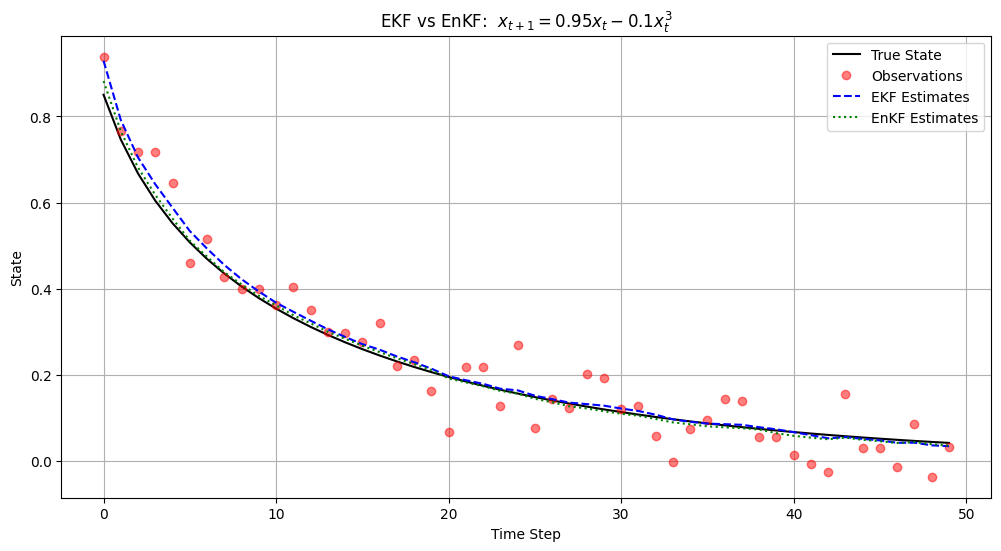

EKF runtime (milliseconds): 3.21
EnKF runtime (milliseconds): 90.48


In [17]:
from DA import ekf_predict, ekf_update, initialize_ensemble, forecast_ensemble, update_ensemble
import time

# Nonlinear dynamical model and its Jacobian
def nonlinear_dynamics(state, a=0.95, b=0.1):
    return a * state - b * state**3

def jacobian_nonlinear_dynamics(state, a=0.95, b=0.1):
    return np.array([[a - 3 * b * state[0]**2]])

# Linear observation function and its Jacobian
def observation_function(state):
    return np.array([state[0]])

def jacobian_observation_function(state):
    return np.array([[1]])

# Initialize parameters
num_steps = 50
initial_state = np.array([1.0])
process_noise_std = 0.02
observation_noise_std = 0.05
observation_noise_cov = np.array([[0.05]])
ensemble_size = 100

# Generate true states and observations
true_states = np.zeros(num_steps)
observations = np.zeros(num_steps)
current_state = initial_state
np.random.seed(0)
for t in range(num_steps):
    true_states[t] = nonlinear_dynamics(current_state)
    observations[t] = observation_function(true_states[t:t+1]) + np.random.normal(0, observation_noise_std)
    current_state = true_states[t:t+1]

# Initialize EKF and EnKF
ekf_state = initial_state.copy()
ekf_covariance = np.array([[1]])
enkf_ensemble = initialize_ensemble(initial_state, np.array([[1]]), ensemble_size)

# Apply EKF over time
start_ekf = time.time()
ekf_estimates = np.zeros(num_steps)
for t in range(num_steps):
    F = jacobian_nonlinear_dynamics(ekf_state)
    predicted_state, predicted_covariance = ekf_predict(ekf_state, ekf_covariance, nonlinear_dynamics, F, np.array([[process_noise_std**2]]))
    H = jacobian_observation_function(predicted_state)
    ekf_state, ekf_covariance = ekf_update(predicted_state, predicted_covariance, observations[t:t+1], observation_function, H, observation_noise_cov)
    ekf_estimates[t] = ekf_state[0]
end_ekf = time.time()

# Apply EnKF over time
start_enkf = time.time()
enkf_estimates = np.zeros(num_steps)
for t in range(num_steps):
    enkf_ensemble = forecast_ensemble(enkf_ensemble, lambda x: nonlinear_dynamics(x) + np.random.normal(0, process_noise_std, size=x.shape))
    enkf_ensemble = update_ensemble(enkf_ensemble, observations[t:t+1], np.array([[1]]), observation_noise_cov)
    enkf_estimates[t] = np.mean(enkf_ensemble[:, 0])
end_enkf = time.time()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(true_states, label='True State', linestyle='-', color='black')
plt.plot(observations, label='Observations', linestyle='none', marker='o', color='red', alpha=0.5)
plt.plot(ekf_estimates, label='EKF Estimates', linestyle='--', color='blue')
plt.plot(enkf_estimates, label='EnKF Estimates', linestyle=':', color='green')
plt.title('EKF vs EnKF:  $x_{t+1} = 0.95 x_t - 0.1 x_t^3$')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()

print(f'EKF runtime (milliseconds): {(end_ekf - start_ekf) * 1000:.2f}')
print(f'EnKF runtime (milliseconds): {(end_enkf - start_enkf) * 1000:.2f}')

The output plot compares the true states, observations, and estimates from both filters. We can observe how closely each filter tracks the true system state despite the nonlinear dynamics and observation noise. Overall, the EnKF demonstrates better performance in handling nonlinearities compared to the EKF, given the ensemble sufficiently large and diverse enough to capture the state space's complexity, with the tradeoff of taking longer to compute.

### Module 8: 3D-Var

#### Overview
3D-Var is employed to find the best estimate of the current state by minimizing a cost function that quantifies the difference between a forecast (background) state and the observations.

#### Theoretical Background
- The construction of the cost function in 3D-Var involves terms that measure the discrepancy between the forecast state and the observations, weighted by their respective error covariances.
- Minimizing this cost function leads to an analysis state that is an optimal blend of the background information and the observations, adjusted by the respective uncertainties.

#### Mathematical Formulations
- The analysis state is derived by setting the gradient of the cost function to zero, leading to:
  $$ x_a = \text{argmin}_x J(x) $$
- The cost function $J(x)$ is expressed as:
  $$ J(x) = \frac{1}{2} (x - x_b)^T B^{-1} (x - x_b) + \frac{1}{2} (y - Hx)^T R^{-1} (y - Hx) $$
- Here, $x_b$ represents the background state, $B$ is the background error covariance matrix, $H$ is the observation operator, and $R$ is the observation error covariance matrix.

#### Example Problem
In this scenario, 3D-Var data assimilation is applied to a week-long temperature dataset, recorded hourly at three different locations. The temperatures exhibit daily cycles modulated by sine waves, with each location having a distinct average temperature and amplitude. The true state includes a linear warming trend and random fluctuations to simulate variable weather conditions (like clouds and rain). Observations are generated with added Gaussian noise to mimic measurement inaccuracies. An intentionally imperfect model is used for the background state, underestimating both the cycle amplitude and missing some of the weather-induced variations. The 3D-Var method assimilates these noisy observations to correct the background state, effectively adjusting it towards the true state, demonstrating the power of data assimilation in improving forecast accuracy in the presence of both model errors and observational uncertainties.

The setup is given as follows: 
- **Set Up Initial Conditions and Parameters**: We will define the true state, the background state (our initial guess), the observation vector (noisy measurements), and the matrices required for the 3D-Var assimilation.
- **Define Matrices**: We'll set up the background error covariance matrix, observation error covariance matrix, and the observation operator matrix.
- **Data Assimilation**: Using the `three_d_var` function to assimilate the observations and update our state estimate.
- **Plot Results**: Visualize the true state, observed state, background state, and the analysis state to assess the effectiveness of the data assimilation.

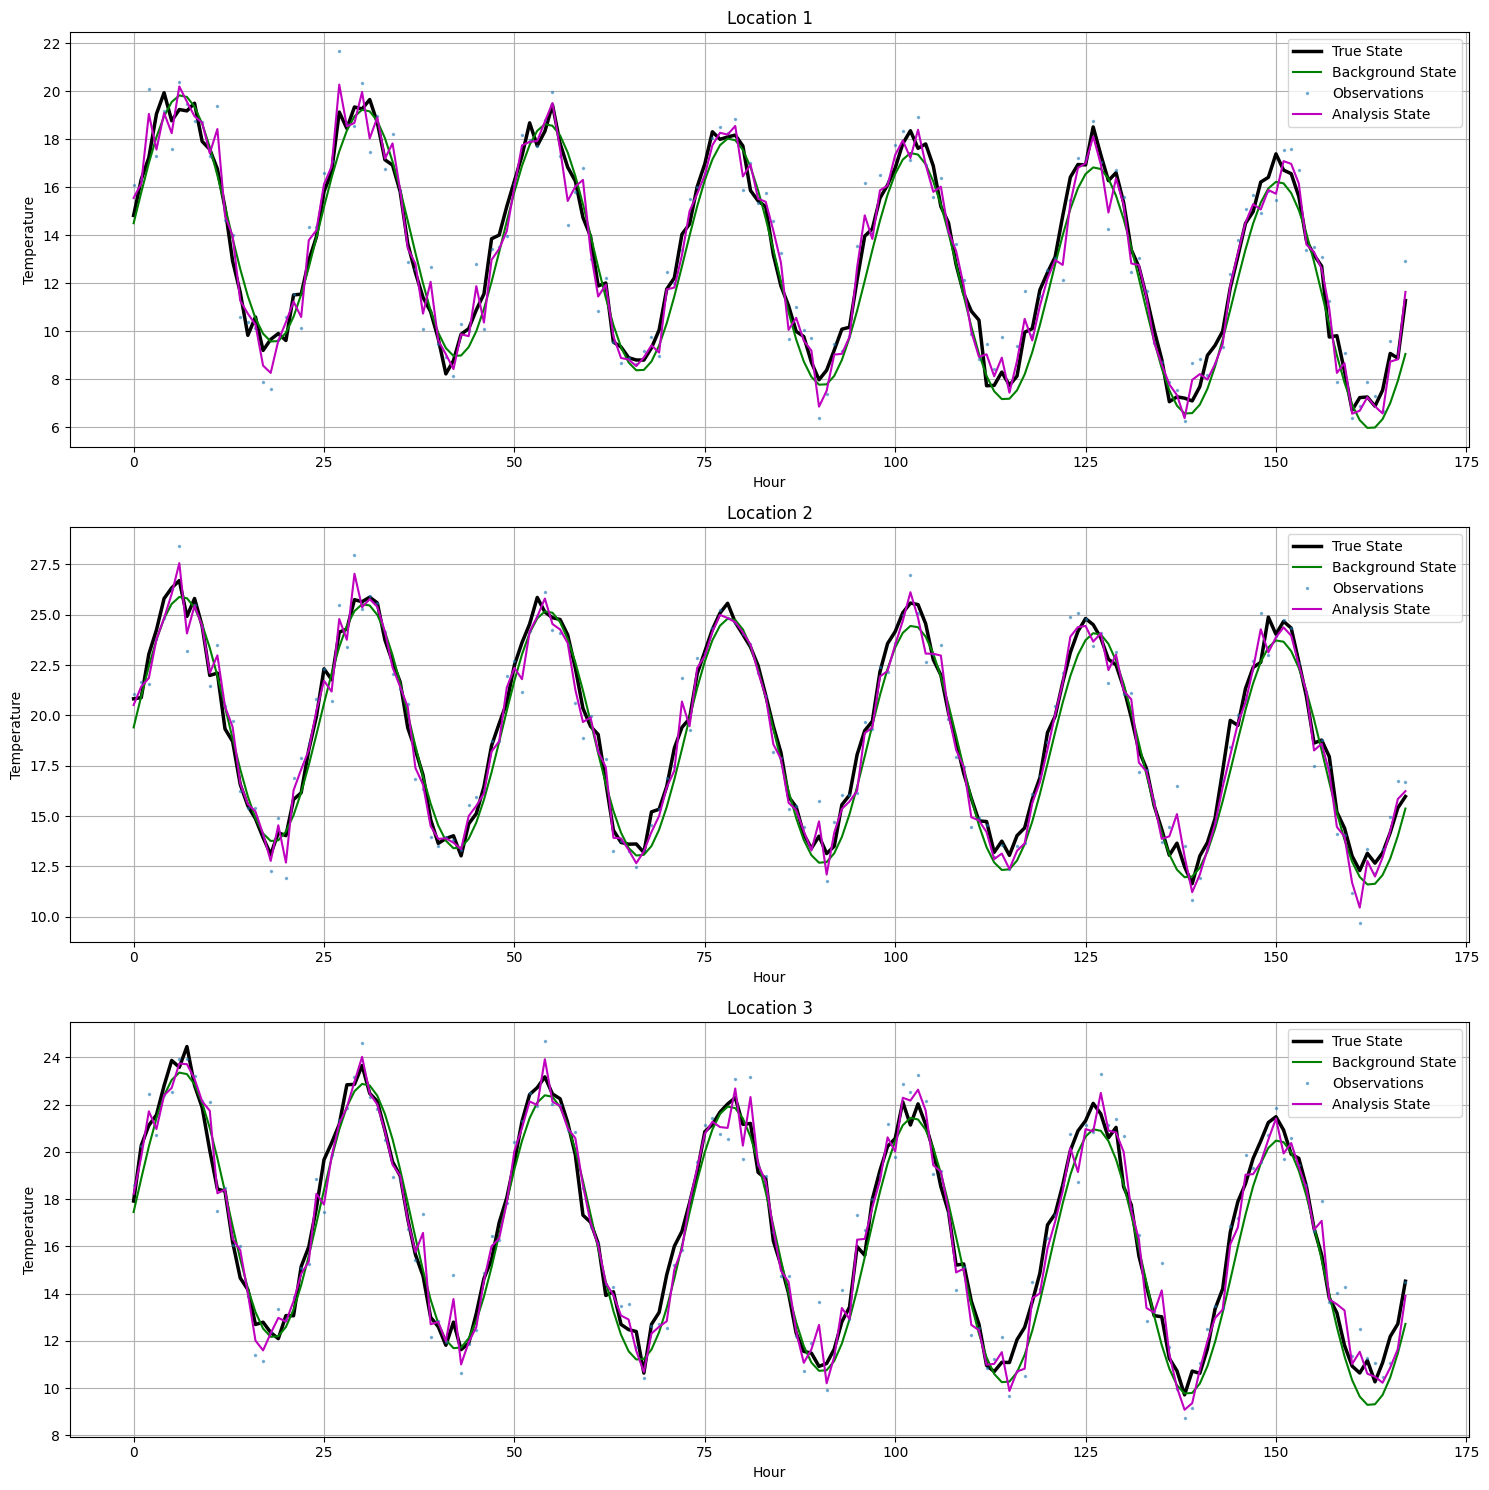

In [18]:
from scipy.optimize import minimize
from DA import three_d_var

# Constants
hours_per_day = 24
days = 7
total_hours = days * hours_per_day
time = np.arange(total_hours)

# True state generation
frequencies = [1/24, 1/24, 1/24]  # Daily cycle
amplitudes = [5, 6, 5.5]  # Different amplitudes for locations
offsets = [15, 20, 18]  # Average temperatures
trends = [-0.02, -0.01, -0.015]  # Gradual decrease in temperature
x_true = np.array([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time) + offsets[i] + trends[i] * time + np.random.normal(0, 0.5, total_hours) for i in range(3)])

# Background state (imperfect model)
xb = np.array([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time - 0.1) + offsets[i] + (trends[i] - 0.005) * time for i in range(3)])

# Observation vector (noisy measurements)
y = x_true + np.random.normal(0, 1, (3, total_hours))

# Background error covariance matrix
B = np.diag([2.0, 2.0, 2.0])  # Less confidence in the background state

# Observation error covariance matrix
R = np.diag([1.0, 1.0, 1.0])  # Observational error

# Observation operator matrix (direct observation of all state variables)
H = np.eye(3)

# Run the 3DVar data assimilation for each hour
x_analysis = np.zeros_like(x_true)
for hour in range(total_hours):
    x_analysis[:, hour] = three_d_var(xb[:, hour], B, y[:, hour], H, R)

# Plotting the results
plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(time, x_true[i, :], 'k', label='True State', linewidth=2.5)
    plt.plot(time, xb[i, :], 'g', label='Background State')
    plt.plot(time, y[i, :], '.', markersize=3, label='Observations', alpha=0.5)
    plt.plot(time, x_analysis[i, :], 'm', label='Analysis State')
    plt.title(f'Location {i+1}')
    plt.xlabel('Hour')
    plt.ylabel('Temperature')
    plt.legend(loc='upper right')
    plt.grid(True)
plt.tight_layout()
plt.show()


### Module 9: 4D-Var

#### Overview
4D-Var is a data assimilation technique that extends the concepts of 3D-Var by incorporating the temporal dimension into the assimilation process. This method adjusts the entire trajectory of the state estimate over a defined time window, rather than focusing on a single time step.

#### Theoretical Background
- 4D-Var involves trajectory optimization, which allows it to consider the evolution of the state over time. This approach provides a more comprehensive treatment of the dynamics compared to 3D-Var.
- The integration of information across multiple time steps enables 4D-Var to refine state estimates by taking into account the temporal correlation of the state and observations.

#### Mathematical Formulations
- The cost function in 4D-Var is defined to include contributions from the initial state at the start of the assimilation window and the deviations of predicted states from their respective observations throughout the window:
  $$ J(x_0) = \frac{1}{2} (x_0 - x_b)^T B^{-1} (x_0 - x_b) + \frac{1}{2} \sum_{k=1}^n (y_k - H_k x_k)^T R_k^{-1} (y_k - H_k x_k) $$
- Here, $x_0$ is the initial state, $x_b$ is the background state at the initial time, $B$ is the background error covariance matrix, $y_k$ are the observations at time $k$, $H_k$ are the observation operators at time $k$, and $R_k$ are the observation error covariances at time $k$. The states $x_k$ are derived from $x_0$ using the model dynamics.

Regrettably, the implementation and example setup for the 4DVar data assimilation were not finalized within the designated timeframe. Consequently, there are no results available to present at this time. This limitation underscores the intricate nature and challenges associated with establishing a fully functional 4DVar example. Future efforts will be directed towards resolving these challenges and completing the code and example. Thank you for your understanding.


## Conclusions

This work examined various data assimilation techniques and demonstrated their application through simple examples and theoretical discussions, emphasizing the utility of both linear and nonlinear data assimilation methods by merging observational data with dynamic models to enhance prediction accuracy. These methods have been demonstrated to be indispensable in fields requiring real-time data integration and predictive modeling.

The content of this report is designed to complement the computational data assimilation notebooks and homework assignments provided in the course. By aligning the examples and discussions with practical exercises and theoretical content covered in class, the report serves as an educational tool, summarizing the data assimilation techniques and providing the users with practical skills and theoretical knowledge that can be directly applied to simple problems and translated to more complex settings.

While these larger scale projects offer robust frameworks and extensive functionalities for operational use, the methods detailed in this report are tailored to enhance foundational understanding and practical application in educational settings. For example, while AMLCS-DA provides an automated multilevel calibration scheme suited for complex models, our approach in this report emphasizes manual selection of hyperparameters, demanding some level of understanding the steps of data assimilation, which is aligns with it's educational purpose. Similarly, while DAPPER offers an environment for experimenting with ensemble methods on toy models, this report details the underlying mathematics and provides coding examples that users can directly interact with and modify.

## References



Cohn, S.E., 1997. An Introduction to Estimation Theory (gtSpecial IssueltData Assimilation in Meteology and Oceanography: Theory and Practice). Journal of the Meteorological Society of Japan. Ser. II 75, 257–288. https://doi.org/10.2151/jmsj1965.75.1B_257

DAPPER documentation [WWW Document], URL https://nansencenter.github.io/DAPPER/dapper.html (accessed 4.29.24).

Evensen, G., Vossepoel, F.C., van Leeuwen, P.J., 2022. Data Assimilation Fundamentals: A Unified Formulation of the State and Parameter Estimation Problem. Springer Nature. https://doi.org/10.1007/978-3-030-96709-3

Nino-Ruiz, E.D., Consuegra, R., 2023. AMLCS-DA: A data assimilation package in Python for Atmospheric General Circulation Models. SoftwareX 22. https://doi.org/10.1016/j.softx.2023.101374

## Proposal for Future Research

Building on top of the explanations and implementations of data assimilation techniques outlined in the main report, this proposal drafts a path for extending these methodologies into broader, more complex scenarios. The intent is to leverage the educational foundation provided by the report to tackle new challenges and innovations in data assimilation research.

The main objective of this proposal is to identify and outline potential research directions that can enhance the capabilities of current data assimilation techniques, address existing limitations, and explore new applications. The main paths this work leads to are:

1. **Educational Tools and Simulations**:
   - **Objective**: To develop interactive simulations and educational tools based on the data assimilation techniques discussed in the report.
   - **Approach**: Create online platforms and software that allow students and researchers to simulate different data assimilation scenarios, adjust parameters, and visualize the effects in real-time.
   - **Expected Outcome**: Enhanced learning experiences that aid in the deeper understanding of data assimilation processes and encourage innovative thinking in the application of these techniques.

2. **Integration with High-Dimensional Models**:
   - **Objective**: To enhance the capability of data assimilation methods to handle high-dimensional models typical of climate systems and large-scale atmospheric models.
   - **Approach**: Develop scalable algorithms that leverage distributed computing and advanced machine learning techniques to manage computational complexity and memory requirements.
   - **Expected Outcome**: Improved efficiency and accuracy in data assimilation for complex models, making it feasible to integrate more detailed observations and simulations.

3. **Real-Time Data Assimilation Systems**:
   - **Objective**: To create real-time data assimilation frameworks that can provide immediate feedback and predictions in dynamic environments such as weather forecasting and ocean monitoring.
   - **Approach**: Utilize streaming data platforms and real-time analytical techniques to update predictions continuously as new data becomes available.
   - **Expected Outcome**: Systems capable of providing timely and accurate forecasts that can be critical for disaster management and mitigation strategies.

4. **Assimilation of Unstructured Data**:
   - **Objective**: To expand data assimilation techniques to incorporate unstructured data sources, such as satellite imagery and social media feeds, for environmental modeling and prediction.
   - **Approach**: Implement advanced image processing and natural language processing tools to extract usable data from unstructured sources and integrate them into existing data assimilation frameworks.
   - **Expected Outcome**: Enhanced models that utilize a broader range of data sources for more comprehensive and accurate environmental monitoring and prediction.

These research directions align with the advancement the field of data assimilation and also pushes towards accessibility to the broader scientific and academic communities.